In [10]:
import praw

reddit = praw.Reddit(client_id='Pj5o8QpNXXJY9A',
                    client_secret='pQKMRBmhp0In48NoNvvktfRo2eA',
                    pasword = 'prawisgreat',
                    user_agent='Reddit Unlocked CS196 Project @ UIUC',
                    username='RedditUnlocked196')
news = reddit.subreddit('news')
for submission in news.top('year'):
    print(submission.url)

Version 5.1.0 of praw is outdated. Version 5.2.0 was released Tuesday October 24, 2017.
http://wtkr.com/2017/07/20/tmz-report-chester-bennington-of-linkin-park-commits-suicide/
http://www.independent.co.uk/news/world/asia/japanese-firm-piala-inc-tokyo-non-smokers-extra-six-days-holiday-cigarette-break-a8028541.html
http://www.reuters.com/article/us-usa-trump-immigration-idUSKBN15E1DE
http://abcn.ws/2qPcnnU
http://www.prnewswire.com/news-releases/american-icon-and-playboy-founder-hugh-m-hefner-has-died-300527267.html
https://lbpost.com/life/pets/2000011459-pet-store-bill-passes-california-senate-38-to-0
http://money.cnn.com/2017/02/24/media/cnn-blocked-white-house-gaggle/index.html
https://www.independent.co.uk/news/uk/home-news/billy-caldwell-cannabis-oil-boy-seizures-stopped-cured-prescription-medical-marijuana-a7933066.html
http://www.independent.co.uk/life-style/gadgets-and-tech/news/youtube-daddyofive-cody-videos-watch-children-custody-latest-prank-parents-a7713376.html
http://peop

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly
plotly.tools.set_credentials_file(username='reddit_unlocked', api_key='gfnXKc7JvUKST4HRJyFX')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [12]:
top10news_df = pd.DataFrame({
    'title': (),
    'url' : (),
    'upvote_percentage': (),
    'year_posted': (),
    'month_posted': (),
    'day_posted': (),
    'is_self': (),
    'is_video': (),
    'media': (),
    'domain': (),
    'upvotes': (),
    'downvotes': (),
    'score': (),
    'views': ()
})
for submission in news.top('year', limit = 10):
    s = pd.Series([submission.title, submission.url, submission.upvote_ratio * 100,
                   datetime.utcfromtimestamp(submission.created_utc).year,
                  datetime.utcfromtimestamp(submission.created_utc).month,
                  datetime.utcfromtimestamp(submission.created_utc).day,
                  submission.is_self, submission.is_video, submission.media, submission.domain,
                   submission.score, submission.view_count,
                   int((submission.score * submission.upvote_ratio)/(2 * submission.upvote_ratio - 1))],
                  index=['title','url','upvote_percentage', 'year_posted', 'month_posted',
                         'day_posted', 'is_self', 'is_video', 'media', 'domain', 'score','views', 'upvotes'])
    top10news_df = top10news_df.append(s, ignore_index=True)
top10news_df['downvotes'] = top10news_df['upvotes'] - top10news_df['score']
top10news_df

,day_posted,domain,downvotes,is_self,is_video,media,month_posted,score,title,upvote_percentage,upvotes,url,views,year_posted
0,20.0,wtkr.com,29079.0,0.0,0.0,None,7.0,123586.0,Chester Bennington of Linkin Park commits suicide,84.0,152665.0,http://wtkr.com/2017/07/20/tmz-report-chester-...,None,2017.0
1,31.0,independent.co.uk,8447.0,0.0,0.0,None,10.0,123894.0,Japanese firm gives non-smokers extra six days...,94.0,132341.0,http://www.independent.co.uk/news/world/asia/j...,None,2017.0
2,31.0,reuters.com,37243.0,0.0,0.0,None,1.0,121531.0,U.S. President Donald Trump fired the federal ...,81.0,158774.0,http://www.reuters.com/article/us-usa-trump-im...,None,2017.0
3,9.0,abcn.ws,17378.0,0.0,0.0,None,5.0,110065.0,James Comey terminated as Director of FBI,88.0,127443.0,http://abcn.ws/2qPcnnU,None,2017.0
4,28.0,prnewswire.com,25440.0,0.0,0.0,None,9.0,108121.0,"American Icon and Playboy Founder, Hugh M. Hef...",84.0,133561.0,http://www.prnewswire.com/news-releases/americ...,None,2017.0
5,13.0,lbpost.com,10177.0,0.0,0.0,None,9.0,106862.0,Pet Store Bill Passes California Senate 38 to ...,92.0,117039.0,https://lbpost.com/life/pets/2000011459-pet-st...,None,2017.0
6,24.0,money.cnn.com,24084.0,0.0,0.0,None,2.0,102359.0,CNN banned from White House press briefing,84.0,126443.0,http://money.cnn.com/2017/02/24/media/cnn-bloc...,None,2017.0
7,7.0,independent.co.uk,26107.0,0.0,0.0,None,9.0,101359.0,Boy who suffered up to 100 seizures a day has ...,83.0,127466.0,https://www.independent.co.uk/news/uk/home-new...,None,2017.0
8,2.0,independent.co.uk,14230.0,0.0,0.0,None,5.0,100907.0,YouTube star Daddyofive loses custody of two c...,89.0,115137.0,http://www.independent.co.uk/life-style/gadget...,None,2017.0
9,27.0,people.com,30423.0,0.0,0.0,None,12.0,99278.0,Carrie Fisher Dies at 60,81.0,129701.0,http://people.com/movies/carrie-fisher-dies/,None,2016.0


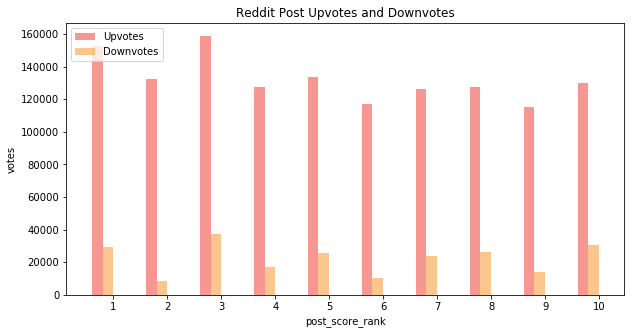

/Users/AlexBraznichenko/miniconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [13]:
#code reference from https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
pos = list(range(len(top10news_df['title'])))
width = .2

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(pos, 
        #using df['upvotes'] data,
        top10news_df['upvotes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in title
        label=top10news_df['title'][0]) 
plt.bar([p + width for p in pos],
       top10news_df['downvotes'],
        width,
        alpha = .5,
        color='#F78F1E',
        label=top10news_df['title'][1]
       )
ax.set_ylabel('votes')
ax.set_xlabel('post_score_rank')
ax.set_title('Reddit Post Upvotes and Downvotes')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(range(1,11))
plt.legend(['Upvotes', 'Downvotes'], loc='upper left')
plt.show()
py.iplot_mpl(fig)

In [16]:
#plotly interactive barchart testing
#code reference from https://plot.ly/python/ipython-notebook-tutorial/#plotting-interactive-maps
trace_upvotes = Bar(x=top10news_df.title,
                   y=top10news_df.upvotes,
                   name='Upvotes',
                   marker=dict(color='#FFCDD2'))

trace_downvotes = Bar(x=top10news_df.title,
                     y=top10news_df.downvotes,
                     name='Downvotes',
                     marker=dict(color='#A2D5F2'))
data = [trace_upvotes, trace_downvotes]
layout = Layout(title="Reddit Post Upvotes and Downvotes",
               xaxis=dict(title='title'))
fig=Figure(data=data, layout=layout)
py.plot(fig)
py.iplot(fig)

In [17]:
trace1 = go.Scatter(
    x = top10news_df.month_posted,
    y = top10news_df.score,
    mode = 'markers',
    marker = dict(
        size = (top10news_df.upvotes + top10news_df.downvotes) / 200000 * 40,
        color = top10news_df.upvote_percentage,
        colorscale = 'Portland',
        showscale = True
    )
)
layout = go.Layout(
    title = 'Stats of top reddit/r/news posts',
    xaxis = dict(
        title = 'month_posted',
        ticks = 12,
    ),
    yaxis = dict(
        title = 'score',
        ticklen = 5,
    )
)
data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [30]:
#Keyword incorporation
import newspaper
from newspaper import Article
import operator
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/AlexBraznichenko/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [19]:
from textblob import TextBlob

In [37]:
words = []
for i in range(0, len(top10news_df['title'])):
    if (top10news_df['is_self'][i] == 0.0):
        a = Article(top10news_df['url'][i], language = 'en')
        a.download()
        a.parse()
        a.text
        a.nlp()
        words.append(TextBlob(a.text))
proper_nouns = []
for post in words:
    for word in post.tags:
        if word[1] == 'NNP':
            proper_nouns.append(word[0])
proper_nouns

['LOS',
 'ANGELES',
 '–',
 'Chester',
 'Bennington',
 'Linkin',
 'Park',
 'Thursday',
 'LA',
 'County',
 'Coroner',
 '’',
 'Palos',
 'Verdes',
 'Estates',
 'Thursday',
 'Bennington',
 '’',
 '“',
 'Hybrid',
 'Theory',
 '”',
 'Bennington',
 '’',
 'Bennington',
 'Guardian',
 '”',
 '’',
 'Bennington',
 'My',
 'God',
 '“',
 'Numb/Encore',
 '”',
 'Numb',
 'Jay-Z',
 '’',
 '“',
 'Encore.',
 'Collision',
 'Course',
 '”',
 'Grammy',
 'Awards',
 'Soundgarden',
 'Chris',
 'Cornell',
 'Bennington',
 '’',
 'May',
 'Bennington',
 'Leonard',
 'Cohen',
 '’',
 '“',
 'Hallejulah',
 '”',
 'Cornell',
 '’',
 'Mike',
 'Shinoda',
 '@',
 'July',
 'Bennington',
 '’',
 'Mike',
 'Shinoda',
 '“',
 'Shocked',
 '”',
 'Late',
 'Jimmy',
 'Kimmel',
 '“',
 'Chester',
 '”',
 'Bennington',
 'Linkin',
 'Park',
 '’',
 'Light',
 '”',
 'May',
 'Boston',
 'National',
 'Suicide',
 'Prevention',
 'Lifeline',
 'Piala',
 'Inc',
 'September',
 'Hirotaka',
 'Matsushima',
 'Telegraph',
 'CEO',
 'Takao',
 'Asuka',
 'Mr',
 'Matsushima'